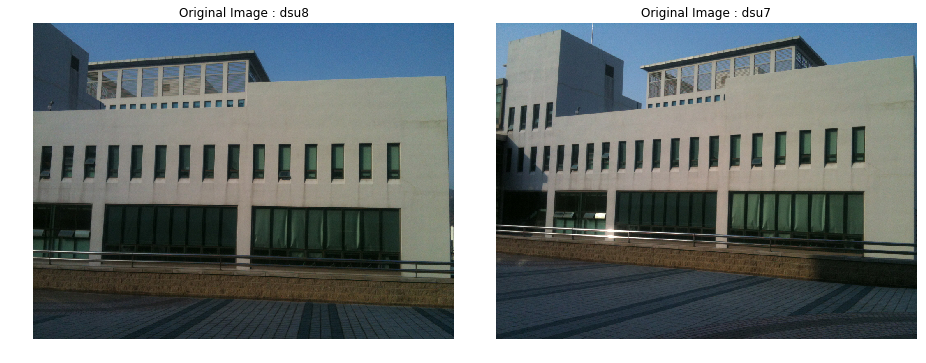

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randrange

org_img1 = cv2.imread('./data/dsu8.jpg')
img1 = cv2.cvtColor(org_img1,cv2.COLOR_BGR2GRAY)
org_img2 = cv2.imread('./data/dsu7.jpg')
img2 = cv2.cvtColor(org_img2,cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(13, 9))

fig.add_subplot(1,2,1)
plt.title('Original Image : dsu8')
plt.imshow(cv2.cvtColor(org_img1, cv2.COLOR_BGR2RGB))
plt.axis('off')

fig.add_subplot(1,2,2)
plt.title('Original Image : dsu7')
plt.imshow(cv2.cvtColor(org_img2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

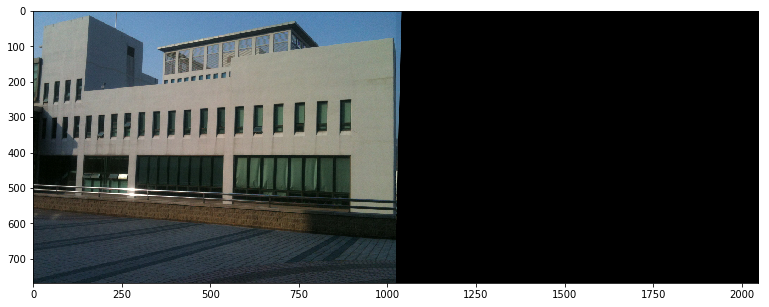

<Figure size 432x288 with 0 Axes>

In [32]:
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m in matches:
    if m[0].distance < 0.5*m[1].distance:
        good.append(m)
        matches = np.asarray(good)

if len(matches[:,0]) >= 4:
    src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
else:
    raise AssertionError('Can’t find enough keypoints.')

dst = cv2.warpPerspective(img_,H,(img.shape[1] + img_.shape[1], img.shape[0]))

dst[0:img.shape[0], 0:img.shape[1]] = img

fig = plt.figure(figsize=(13, 9))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

plt.tight_layout()
plt.show()